# Hyperparameters Tunning for Deep Learning Models (full of errors)
TODO add description

In [14]:
import optuna 
import sys; sys.path.append('..')
from thesis_package import utils, aimodels as myai, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
num_trials = 50

# Max u

## MLP: Sparse Classification Dataset

Build optuna study...

[I 2022-09-24 23:12:14,041] A new study created in memory with name: no-name-a6944c76-5897-4601-bd82-f5d263d7f3e6
[I 2022-09-24 23:14:20,851] Trial 0 finished with value: 0.13133526542729906 and parameters: {'hidden_size': 49, 'n_layers': 3, 'dropout': 0.45152701006500257, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.00023908249074962933, 'epochs': 25, 'batch_size': 1024}. Best is trial 0 with value: 0.13133526542729906.
[I 2022-09-24 23:18:06,685] Trial 1 finished with value: 0.13752323027538435 and parameters: {'hidden_size': 79, 'n_layers': 3, 'dropout': 0.012895572992448923, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.0015402317829595917, 'epochs': 29, 'batch_size': 1024}. Best is trial 1 with value: 0.13752323027538435.
[I 2022-09-25 13:45:55,680] Trial 2 finished with value: 0.1341652613827993 and parameters: {'hidden_size': 49, 'n_layers': 2, 'dropout': 0.07557772876645275, 'activation': 'relu', 'optimizer': 'adam', 'lr': 0.02192105818054348, 'epochs': 70, 'batch_s

Number of finished trials:  50
Best trial:
  Value: 0.20501329656259235
  Params: 
    hidden_size: 43
    n_layers: 2
    dropout: 0.09295593470419183
    activation: tanh
    optimizer: adam
    lr: 0.002704170984503173
    epochs: 89
    batch_size: 128


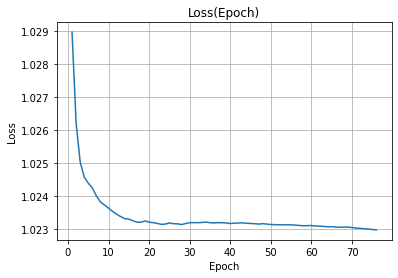

In [15]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_sparse_bool_constr.csv').drop(columns='timestamps') 
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_max_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_sparse_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

In [16]:
y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_sparse_bool_constr.csv').drop(columns='timestamps') 

In [17]:
y_max_u_bool.columns

Index(['ext_grid', 'bus_1', 'bus_2', 'bus_3', 'bus_4', 'bus_5', 'bus_6',
       'bus_7', 'bus_8', 'bus_9', 'bus_10', 'bus_11', 'bus_12', 'bus_13',
       'bus_14', 'bus_15', 'bus_16', 'bus_19', 'bus_20', 'bus_22', 'bus_25',
       'bus_26', 'bus_28', 'bus_29', 'bus_30', 'bus_31', 'bus_17', 'bus_21',
       'bus_24', 'bus_18', 'bus_23', 'bus_27', 'bus_32', 'bus_33'],
      dtype='object')

Now we confirm that the target feature is created correctly, being in accord with the sparse dataset.

## MLP: Balanced Classification Dataset

[I 2022-09-25 18:36:38,578] A new study created in memory with name: no-name-8df87e39-1256-4bb9-ad64-6e410be7cf3b
[I 2022-09-25 18:36:48,043] Trial 0 finished with value: 0.5653804930332261 and parameters: {'hidden_size': 44, 'n_layers': 1, 'dropout': 0.08646101783943694, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 1.470310530706917e-05, 'epochs': 17, 'batch_size': 256}. Best is trial 0 with value: 0.5653804930332261.
[I 2022-09-25 18:37:24,253] Trial 1 finished with value: 0.5538747963695602 and parameters: {'hidden_size': 52, 'n_layers': 2, 'dropout': 0.06766504979556764, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 2.275925090969087e-05, 'epochs': 82, 'batch_size': 32}. Best is trial 0 with value: 0.5653804930332261.
[I 2022-09-25 18:37:34,442] Trial 2 finished with value: 0.36777695009045436 and parameters: {'hidden_size': 28, 'n_layers': 1, 'dropout': 0.43144091380130756, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 4.8626138613106234e-05, 'epochs': 32, 'batch_size':

Number of finished trials:  50
Best trial:
  Value: 0.666892177589852
  Params: 
    hidden_size: 73
    n_layers: 3
    dropout: 0.027925450381307542
    activation: tanh
    optimizer: adam
    lr: 0.0009714183218071047
    epochs: 78
    batch_size: 4


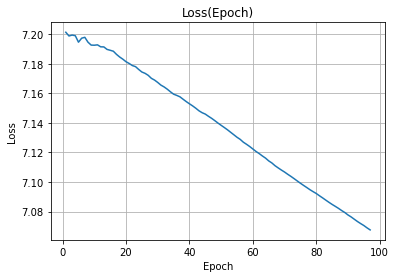

In [18]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_bool_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_max_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_balanced_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-25 19:24:13,496] A new study created in memory with name: no-name-e6aab5c2-38df-4b62-8b26-366f0e3c09eb
[I 2022-09-25 19:27:56,765] Trial 0 finished with value: 0.6862983627190546 and parameters: {'hidden_size': 100, 'n_layers': 2, 'dropout': 0.359717853520493, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 7.244977725925056e-05, 'epochs': 45, 'batch_size': 512}. Best is trial 0 with value: 0.6862983627190546.
[I 2022-09-25 19:29:50,177] Trial 1 finished with value: 0.9801631575379903 and parameters: {'hidden_size': 9, 'n_layers': 2, 'dropout': 0.44037670487340946, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.0028562249105677433, 'epochs': 28, 'batch_size': 2}. Best is trial 1 with value: 0.9801631575379903.
[I 2022-09-25 19:33:46,102] Trial 2 finished with value: 0.9919956602924972 and parameters: {'hidden_size': 53, 'n_layers': 1, 'dropout': 0.05919324549049415, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.00012172340595728511, 'epochs': 50, 'batch_size': 

Number of finished trials:  50
Best trial:
  Value: 0.9920083183694078
  Params: 
    hidden_size: 31
    n_layers: 2
    dropout: 0.10137160649535842
    activation: sigmoid
    optimizer: sgd
    lr: 0.04276419439103241
    epochs: 60
    batch_size: 32


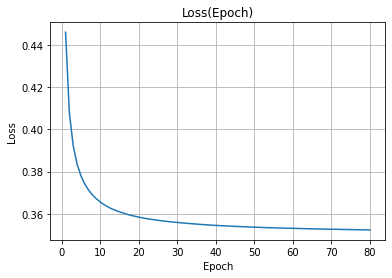

In [19]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_sparse_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

[I 2022-09-25 22:23:27,717] A new study created in memory with name: no-name-b2d069f3-c7d6-4b85-9bd2-054dfb66ff78
[I 2022-09-25 22:23:31,228] Trial 0 finished with value: 0.213894008032765 and parameters: {'hidden_size': 27, 'n_layers': 1, 'dropout': 0.08696690585687095, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.0002233849073013031, 'epochs': 18, 'batch_size': 32}. Best is trial 0 with value: 0.213894008032765.
[I 2022-09-25 22:23:38,766] Trial 1 finished with value: 0.9103769998280371 and parameters: {'hidden_size': 28, 'n_layers': 3, 'dropout': 0.1592470242912769, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.07088314814776354, 'epochs': 22, 'batch_size': 1024}. Best is trial 0 with value: 0.213894008032765.
[I 2022-09-25 22:23:41,191] Trial 2 finished with value: 0.12365847459795942 and parameters: {'hidden_size': 53, 'n_layers': 2, 'dropout': 0.40848944087962297, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 9.456729642747575e-05, 'epochs': 10, 'batch_size': 2}. Best

Number of finished trials:  50
Best trial:
  Value: 0.11670139032418816
  Params: 
    hidden_size: 34
    n_layers: 3
    dropout: 0.0030412321477918842
    activation: relu
    optimizer: sgd
    lr: 9.741292351005151e-05
    epochs: 55
    batch_size: 8


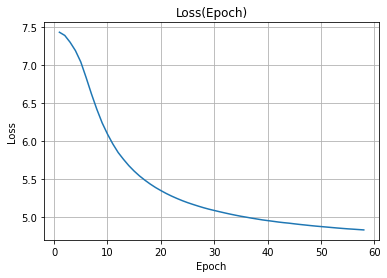

In [20]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_focused_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_focused.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    # print(model.strategy.model.eval())
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    # print('bus_16 prediction: ', prediction['bus_16'])
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_max_u_train.loc[:, y_max_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    # print('threshold: ', threshold)
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    return mean_squared_error(data['y_test'], prediction, squared=False)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_focused_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Filtered Dataset

[I 2022-09-25 22:34:05,072] A new study created in memory with name: no-name-9bdc193a-2408-4887-86db-6d5abad56f53
[I 2022-09-25 22:36:34,977] Trial 0 finished with value: 0.9768957421493873 and parameters: {'hidden_size': 33, 'n_layers': 2, 'dropout': 0.006553439333941646, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.08440827938737518, 'epochs': 58, 'batch_size': 256}. Best is trial 0 with value: 0.9768957421493873.
[I 2022-09-25 22:40:22,867] Trial 1 finished with value: 0.9267051463364323 and parameters: {'hidden_size': 23, 'n_layers': 1, 'dropout': 0.415290293213055, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 9.096165207592762e-05, 'epochs': 97, 'batch_size': 512}. Best is trial 0 with value: 0.9768957421493873.
[I 2022-09-25 22:40:41,150] Trial 2 finished with value: 0.9204696091560449 and parameters: {'hidden_size': 72, 'n_layers': 3, 'dropout': 0.3793900354853533, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.003502151507196205, 'epochs': 1, 'batch_size': 1}. B

Number of finished trials:  50
Best trial:
  Value: 0.9919949514104058
  Params: 
    hidden_size: 65
    n_layers: 2
    dropout: 0.13697605155117415
    activation: tanh
    optimizer: adam
    lr: 0.02738090344619159
    epochs: 42
    batch_size: 4


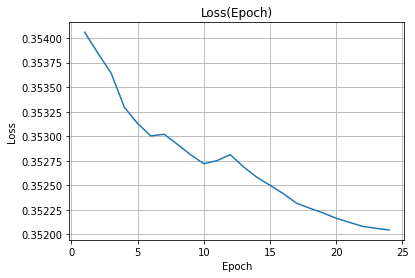

In [21]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u[utils.cols_with_positive_values(y_max_u)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_filtered_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

# Min u

## MLP: Sparse Classification Dataset

[I 2022-09-26 00:35:44,427] A new study created in memory with name: no-name-0adbdafa-8cd7-45c3-a558-0034d40789eb
[I 2022-09-26 00:36:53,615] Trial 0 finished with value: 0.20328837844409944 and parameters: {'hidden_size': 45, 'n_layers': 2, 'dropout': 0.18407607051381902, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.005352530091742033, 'epochs': 21, 'batch_size': 8}. Best is trial 0 with value: 0.20328837844409944.
[I 2022-09-26 00:39:48,224] Trial 1 finished with value: 0.1885270234872959 and parameters: {'hidden_size': 5, 'n_layers': 1, 'dropout': 0.00035940546641549664, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.002339493947184752, 'epochs': 91, 'batch_size': 32}. Best is trial 0 with value: 0.20328837844409944.
[I 2022-09-26 00:43:34,521] Trial 2 finished with value: 0.1755416210477423 and parameters: {'hidden_size': 77, 'n_layers': 2, 'dropout': 0.08738606978198937, 'activation': 'relu', 'optimizer': 'adam', 'lr': 0.05711996864893473, 'epochs': 59, 'batch_size': 

Number of finished trials:  50
Best trial:
  Value: 0.22329687038053808
  Params: 
    hidden_size: 58
    n_layers: 1
    dropout: 0.39114601772840446
    activation: relu
    optimizer: adam
    lr: 0.0026213906541996917
    epochs: 87
    batch_size: 64


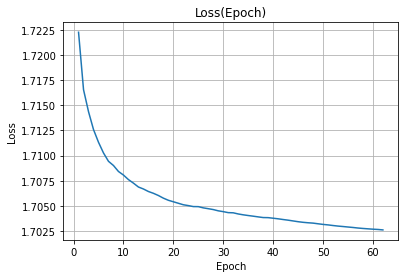

In [22]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_sparse_bool_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_bool_train, X_min_u_bool_test, y_min_u_bool_train, y_min_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_bool_train.astype(float),
            'X_test': X_min_u_bool_test.astype(float),
            'y_train':y_min_u_bool_train.astype(float),
            'y_test': y_min_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_sparse_classifier_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Balanced Classification Dataset

[I 2022-09-26 02:06:26,160] A new study created in memory with name: no-name-c69cc36a-fc9b-429a-b39d-8f34ef027baf
[I 2022-09-26 02:07:55,121] Trial 0 finished with value: 0.5578813250819075 and parameters: {'hidden_size': 37, 'n_layers': 2, 'dropout': 0.15239105543842252, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.00031011676476308276, 'epochs': 100, 'batch_size': 128}. Best is trial 0 with value: 0.5578813250819075.
[I 2022-09-26 02:08:08,226] Trial 1 finished with value: 0.5359464627151053 and parameters: {'hidden_size': 17, 'n_layers': 3, 'dropout': 0.3349173889758393, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.046859560583164504, 'epochs': 20, 'batch_size': 256}. Best is trial 0 with value: 0.5578813250819075.
[I 2022-09-26 02:08:27,950] Trial 2 finished with value: 0.42023696895976936 and parameters: {'hidden_size': 31, 'n_layers': 3, 'dropout': 0.11341252399989055, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.00010050520213916438, 'epochs': 26, 'batch_size'

Number of finished trials:  50
Best trial:
  Value: 0.610796816569182
  Params: 
    hidden_size: 85
    n_layers: 3
    dropout: 0.14506881483415743
    activation: sigmoid
    optimizer: adam
    lr: 0.0075935750665140096
    epochs: 89
    batch_size: 32


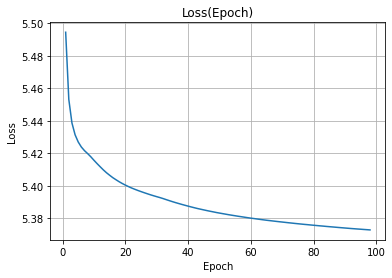

In [23]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_bool_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_balanced_classifier_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-26 03:00:37,369] A new study created in memory with name: no-name-00539dd8-78d2-4306-9f9d-64373af8780c
[I 2022-09-26 03:01:24,594] Trial 0 finished with value: 0.18287126678949822 and parameters: {'hidden_size': 47, 'n_layers': 3, 'dropout': 0.09238856193675271, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.00016115607025602599, 'epochs': 7, 'batch_size': 128}. Best is trial 0 with value: 0.18287126678949822.
[I 2022-09-26 03:02:24,822] Trial 1 finished with value: 0.9562636010386326 and parameters: {'hidden_size': 61, 'n_layers': 2, 'dropout': 0.20992637917304102, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.003255992093238636, 'epochs': 13, 'batch_size': 32}. Best is trial 1 with value: 0.9562636010386326.
[I 2022-09-26 03:04:58,275] Trial 2 finished with value: 0.7505306724365305 and parameters: {'hidden_size': 32, 'n_layers': 3, 'dropout': 0.19733959197081136, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.00020728889988491626, 'epochs': 52, 'batch_size

Number of finished trials:  50
Best trial:
  Value: 0.9563157660434441
  Params: 
    hidden_size: 42
    n_layers: 2
    dropout: 0.03362394661710061
    activation: tanh
    optimizer: adam
    lr: 0.00013438857061448843
    epochs: 20
    batch_size: 2


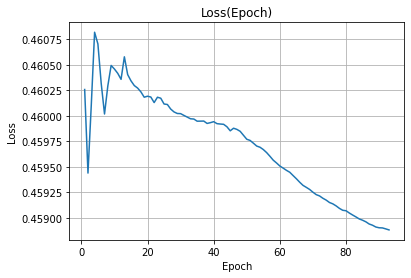

In [24]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u, test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_min_u.columns)
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

[I 2022-09-26 05:22:38,587] A new study created in memory with name: no-name-0bbf3333-7e0e-4346-b365-54a309530ab7
[I 2022-09-26 05:22:43,626] Trial 0 finished with value: 0.9550044510120228 and parameters: {'hidden_size': 54, 'n_layers': 1, 'dropout': 0.23436897415024904, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 7.774252121870947e-05, 'epochs': 16, 'batch_size': 64}. Best is trial 0 with value: 0.9550044510120228.
[I 2022-09-26 05:22:50,919] Trial 1 finished with value: 0.9103411154293424 and parameters: {'hidden_size': 29, 'n_layers': 2, 'dropout': 0.34677465084692993, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0018858461253081146, 'epochs': 26, 'batch_size': 512}. Best is trial 1 with value: 0.9103411154293424.
[I 2022-09-26 05:23:01,096] Trial 2 finished with value: 0.9494902045589187 and parameters: {'hidden_size': 19, 'n_layers': 2, 'dropout': 0.4124889799118654, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.03423255818312652, 'epochs': 38, 'batch_size': 16}. Be

Number of finished trials:  50
Best trial:
  Value: 0.07731086297833932
  Params: 
    hidden_size: 27
    n_layers: 3
    dropout: 0.2515211746984172
    activation: relu
    optimizer: sgd
    lr: 2.9295769171852248e-05
    epochs: 99
    batch_size: 1


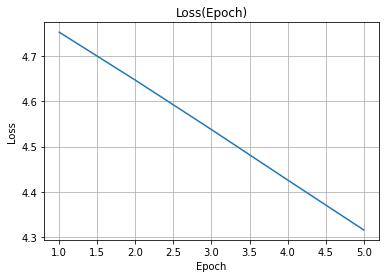

In [25]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_focused_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_min_focused.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    # print(model.strategy.model.eval())
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_min_u.columns)
    # print('bus_16 prediction: ', prediction['bus_16'])
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_min_u_train.loc[:, y_min_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    # print('threshold: ', threshold)
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    return mean_squared_error(data['y_test'], prediction, squared=False)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_focused_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## Regression Filtered Dataset

[I 2022-09-26 05:35:10,972] A new study created in memory with name: no-name-8f102303-149e-4b56-94b3-58f978bee523
[I 2022-09-26 05:35:24,331] Trial 0 finished with value: 0.7690176202597783 and parameters: {'hidden_size': 97, 'n_layers': 2, 'dropout': 0.4951180794516009, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.014471289965624598, 'epochs': 2, 'batch_size': 64}. Best is trial 0 with value: 0.7690176202597783.
[I 2022-09-26 05:36:03,085] Trial 1 finished with value: 0.8567372817813144 and parameters: {'hidden_size': 7, 'n_layers': 1, 'dropout': 0.031689156679935326, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.05571956922439567, 'epochs': 23, 'batch_size': 8}. Best is trial 1 with value: 0.8567372817813144.
[I 2022-09-26 05:39:29,238] Trial 2 finished with value: 0.7389604349680776 and parameters: {'hidden_size': 60, 'n_layers': 3, 'dropout': 0.4165221977198266, 'activation': 'relu', 'optimizer': 'adam', 'lr': 2.447508105423178e-05, 'epochs': 61, 'batch_size': 128}. 

Number of finished trials:  50
Best trial:
  Value: 0.926905724068277
  Params: 
    hidden_size: 66
    n_layers: 3
    dropout: 0.061156922049103134
    activation: relu
    optimizer: sgd
    lr: 0.0284664855313154
    epochs: 78
    batch_size: 32


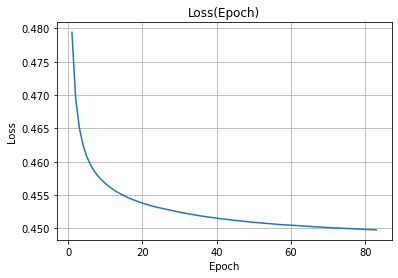

In [26]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u[utils.cols_with_positive_values(y_min_u)], test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u))
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=utils.cols_with_positive_values(y_min_u))
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_filtered_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))